In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
1,2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2,2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
3,2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
4,2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055
...,...,...,...,...,...,...,...
2196,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2197,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2198,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2199,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

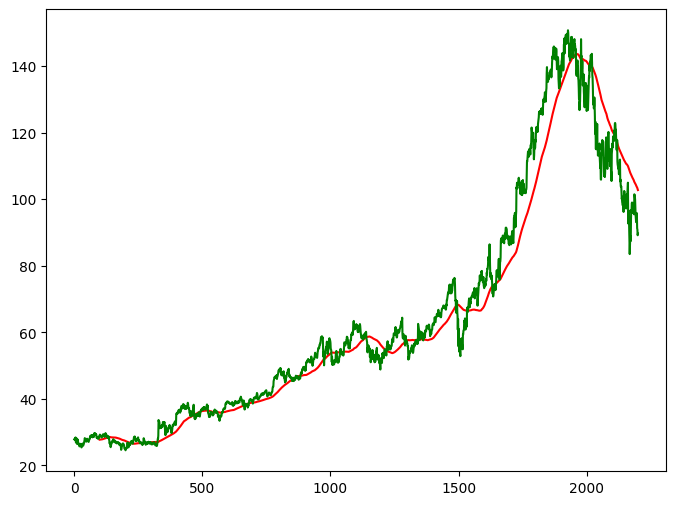

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

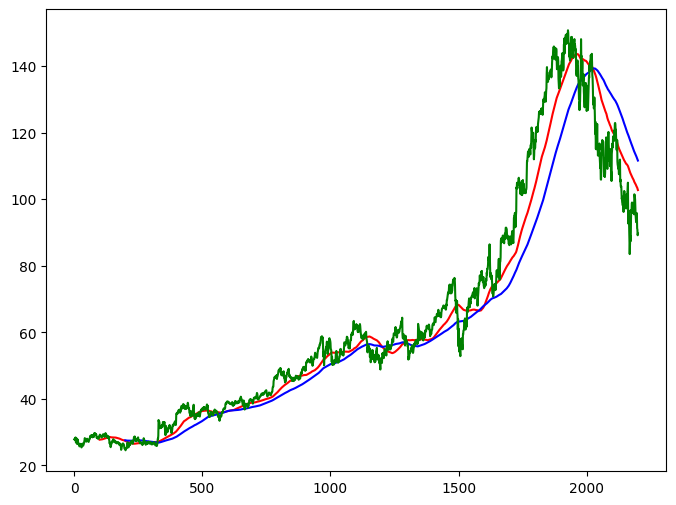

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1760

In [12]:
data_test.shape[0]

441

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\varni\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.0686
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0089
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0059
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0060
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0045
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.0047
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0047
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0043
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0040
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0044
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0044
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0034
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0038
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0031
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss:

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [23]:
data_test_scale  =  scaler.fit_transform(data_test)

In [24]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [26]:
scale =1/scaler.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y = y*scale

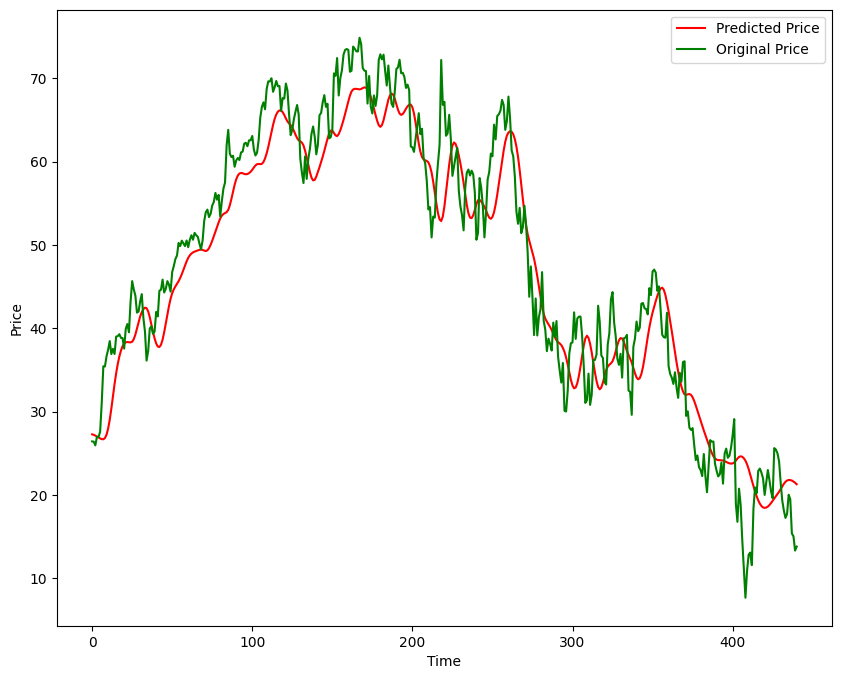

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock Predictions Model.keras')